# patien-value generator

In [3]:
import numpy as np
import scipy.stats as stats

## Generate values for the paient specific-patameters

By sampling from the log-normal distributions.
For the sake of presentation the distributions will be population-wide. In potential clinical usage we could do multiple sampling from patient specific distributions

| Parameter | Definition |
| --- | --- |
| toxicity | initial toxicity |
| burden | initial burden |
| r | growth rate |
| a | [Allee effect](https://en.wikipedia.org/wiki/Allee_effect) |
| s1, s2, s3, s4 | sensitivity to drugs 1, 2, 3, 4 |
| t1, tx2, tx3, tx4 | toxicity from drugs 1, 2, 3, 4 |
| clearRate |  toxicity clearance rate (same for all drugs) |

In [17]:
class PatientGen():
    def __init__(self):
        self._dist = {
            'toxicity': stats.norm(loc = 0.01, scale = 0.001), #
            'burden' : stats.norm(loc = 1e10, scale = 1e10), #
            'r' : stats.gamma(a = 2, scale = 3.850818/2), #
            'a' :  stats.norm(loc = 300, scale = 100), #
            's1' : stats.gamma(a = 2, scale = 2.173619/2), # 
            's2' : stats.gamma(a = 2, scale = 1.514206/2), #
            's3' : stats.gamma(a = 2, scale = 9.3043/2), #
            's4' : stats.gamma(a = 2, scale = 3.850818/2), #
            'tx1' : stats.gamma(a = 2, scale = 4.464/2), #
            'tx2' : stats.gamma(a = 2, scale = 4.204/2), #
            'tx3' : stats.gamma(a = 2, scale = 5.355/2) , #
            'tx4' : stats.gamma(a = 2, scale = 5.355/2) , #
            'clear' : stats.norm(loc = 6, scale = 1) #
        }
        self._rnd = np.random.RandomState(seed=42)

        self._scalers = {
            'toxicity': 1,
            'burden' : 1,
            'r' : 0.001,
            'a' : 1,
            's1' : 0.01,
            's2' : 0.01,
            's3' : 0.001,
            's4' : 0.001,
            'tx1' : 0.1,
            'tx2' : 0.1,
            'tx3' : 0.1,
            'tx4' : 0.1,
            'clear' : 1
        }

    def sample(self):
        patient = {}
        for key, dist in self._dist.items():
            patient[key] = dist.rvs(random_state=self._rnd) * self._scalers[key]
        patient["start_strike"] = 1
        patient["start_cycle"] = 1
        return patient

In [18]:
patient_gen = PatientGen()
sample = patient_gen.sample()
sample

{'toxicity': 0.010496714153011233,
 'burden': 8617356988.288153,
 'r': 0.005103214442972229,
 'a': 452.30298564080255,
 's1': 0.02231747479644801,
 's2': 0.025296476833506373,
 's3': 0.004761970376494695,
 's4': 0.00207261502755459,
 'tx1': 0.012822323364187217,
 'tx2': 0.6766930592684819,
 'tx3': 0.31404023913891765,
 'tx4': 0.2356754292951606,
 'clear': 5.3705250390757495,
 'start_strike': 1,
 'start_cycle': 1}

In [8]:
import matplotlib.pyplot as plt
10^2

8

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

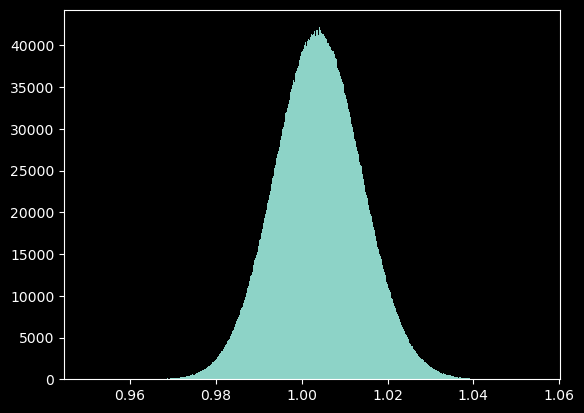

In [16]:
fig, ax = plt.subplots(1, 1)
ax.hist(patient_gen._dist['r'].rvs(size=10000000), bins = 1000)

(array([1.934e+03, 5.822e+03, 7.294e+03, 7.333e+03, 6.888e+03, 6.498e+03,
        5.723e+03, 5.211e+03, 4.679e+03, 4.128e+03, 3.713e+03, 3.375e+03,
        3.010e+03, 2.576e+03, 2.440e+03, 2.142e+03, 2.022e+03, 1.805e+03,
        1.659e+03, 1.489e+03, 1.300e+03, 1.274e+03, 1.080e+03, 9.990e+02,
        9.130e+02, 8.750e+02, 7.520e+02, 7.880e+02, 6.970e+02, 6.380e+02,
        5.770e+02, 5.400e+02, 5.510e+02, 5.150e+02, 4.430e+02, 4.360e+02,
        3.630e+02, 3.470e+02, 3.920e+02, 3.170e+02, 3.120e+02, 2.670e+02,
        2.780e+02, 2.470e+02, 2.440e+02, 2.320e+02, 2.260e+02, 2.110e+02,
        1.900e+02, 1.590e+02, 1.730e+02, 1.710e+02, 1.590e+02, 1.230e+02,
        1.380e+02, 1.230e+02, 1.470e+02, 1.120e+02, 1.160e+02, 1.110e+02,
        1.210e+02, 8.200e+01, 8.900e+01, 9.400e+01, 9.800e+01, 7.800e+01,
        7.900e+01, 6.500e+01, 7.000e+01, 7.300e+01, 6.800e+01, 5.900e+01,
        5.900e+01, 4.600e+01, 5.700e+01, 3.900e+01, 5.200e+01, 3.900e+01,
        4.300e+01, 5.400e+01, 3.600e+0

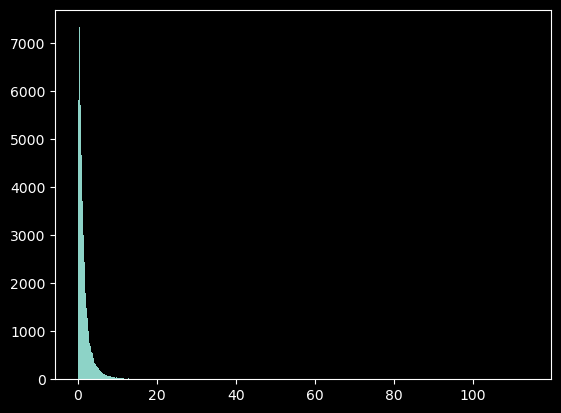

In [26]:
fig, ax = plt.subplots(1, 1)
ax.hist(stats.lognorm.rvs(s = 1, scale = np.exp(0.003850818), size=100000), bins = 1000)

In [6]:
# store sample to patient_config.json
import json
with open('patient_config.json', 'w') as fp:
    json.dump(sample, fp, indent=4)

NameError: name 'sample' is not defined